<a href="https://colab.research.google.com/github/delibae/health_care_pr/blob/pr2%2Fbhj/project_3/%EB%B0%B0%ED%95%9C%EC%A7%84/scalp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

양호 경증 중증도 중증

In [2]:
import pandas as pd
import numpy as np

# ML
import torch
import torchvision

import torchvision.transforms as transforms
from sklearn.model_selection import StratifiedKFold
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split


torch.manual_seed(123)

# Create Dataloader

## Load Data

In [3]:
root_path = '/content/drive/MyDrive/data/scalp/value_6/'

# image_data = np.load(root_path + 'ImageData.npy')
# target = list(map(int,np.load(root_path + 'target.npy').tolist()))
image_data2 = np.load(root_path + 'ImageData2_6.npy')
target2 = list(map(int,np.load(root_path + 'target2_6.npy').tolist()))

In [4]:
# print(image_data.shape)
# print(len(target))
print(image_data2.shape)
print(len(target2))

(5288, 224, 224, 3)
5288


## define transform2

In [5]:
from PIL import Image, ImageOps, ImageEnhance

In [6]:
def get_transform_tr():
  transforms_train = transforms.Compose([
      transforms.ToTensor(),
      transforms.ToPILImage(),
      transforms.Resize((224, 224)),
      transforms.RandomHorizontalFlip(),
      transforms.RandomChoice([
          transforms.RandomResizedCrop(224),
          transforms.RandomAffine(
              degrees=15, translate=(0.2, 0.2),
              scale=(0.8, 1.2), shear=15)
      ]),
      transforms.ToTensor(),
      transforms.Normalize((0.4452, 0.4457, 0.4464), (0.2592, 0.2596, 0.2600)),
    ])
  return transforms_train

In [7]:
def get_transform_te():
  transforms_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.4452, 0.4457, 0.4464), (0.2592, 0.2596, 0.2600)),
])
  return transforms_test

## define dataset2

In [8]:
class CustomDataset_tr(Dataset):
    def __init__(self, img_list, label=None):
        self.transform = get_transform_tr()
        self.img_list = img_list
        self.label = label
        self.transformed_img_list = list(map(self.transform, self.img_list))
        print(self.transformed_img_list)
    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self, i):
        
        x_data = self.transformed_img_list[i]

        return x_data, torch.tensor(self.label[i],dtype = torch.long)

In [9]:
class CustomDataset_te(Dataset):
    def __init__(self, img_list, label=None):
        self.transform = get_transform_te()
        self.img_list = img_list
        self.label = label
        self.transformed_img_list = list(map(self.transform, self.img_list))
        print(self.transformed_img_list)
    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self, i):
        
        x_data = self.transformed_img_list[i]

        return x_data, torch.tensor(self.label[i],dtype = torch.long)

## create image_data_l

In [10]:
image_data_l2 = []

for i in image_data2:
  image_data_l2.append(i)

## Define Dataloader 2

In [11]:
import math

def get_dataloader_tr(x, y):
    # img_list = get_img_list(x)
    dataset = CustomDataset_tr(img_list=x, label=y)

    train_dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size)

    return train_dataloader

def get_dataloader_te(x, y):
    # img_list = get_img_list(x)
    dataset = CustomDataset_te(img_list=x, label=y)

    test_dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size)

    return test_dataloader

## Create Dataloader2

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(image_data_l2, target2, test_size=0.2, shuffle=True, stratify=target2, random_state=34)

batch_size = 32

train_dataloader2 = get_dataloader_tr(x_train,y_train)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
valid_dataloader2 = get_dataloader_te(x_valid,y_valid)

[tensor([[[1.4899, 1.6260, 1.7925,  ..., 0.6426, 0.8393, 0.7788],
         [1.5806, 1.5655, 1.8832,  ..., 0.5518, 0.7183, 0.6426],
         [1.4596, 1.5050, 1.8984,  ..., 0.4913, 0.5972, 0.6729],
         ...,
         [1.8681, 1.4445, 1.2478,  ..., 1.0057, 0.7183, 0.7636],
         [1.7319, 1.7017, 1.5806,  ..., 0.8393, 0.7788, 0.7183],
         [1.1570, 1.5201, 1.7925,  ..., 0.6729, 0.7183, 0.6124]],

        [[1.1684, 1.2590, 1.6065,  ..., 0.6850, 0.8059, 0.6548],
         [1.3346, 1.2893, 1.7122,  ..., 0.6246, 0.7303, 0.7001],
         [1.2288, 1.2893, 1.6971,  ..., 0.5793, 0.6246, 0.6397],
         ...,
         [1.9237, 1.3799, 1.1835,  ..., 0.7152, 0.5037, 0.5188],
         [1.7273, 1.6820, 1.5461,  ..., 0.6246, 0.5188, 0.5188],
         [1.0627, 1.4705, 1.7727,  ..., 0.5793, 0.5491, 0.5340]],

        [[1.0734, 1.1036, 1.2695,  ..., 0.6059, 0.6360, 0.7265],
         [1.1338, 1.0885, 1.4203,  ..., 0.6059, 0.6813, 0.6511],
         [1.0734, 1.0734, 1.4656,  ..., 0.6511, 0.6662, 0

In [14]:
del x_valid
del y_valid
del x_train
del y_train

In [15]:
# del image_data
del image_data2

In [16]:
# del target
del target2

# Efficient Net

## device

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## load model from torch hub

In [16]:
torch.cuda.empty_cache()
torch.cuda.memory_allocated()

0

In [28]:
model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b4', pretrained=True)

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
Downloading: "https://api.ngc.nvidia.com/v2/models/nvidia/efficientnet_b4_pyt_amp/versions/20.12.0/files/nvidia_efficientnet-b4_210412.pth" to /root/.cache/torch/hub/checkpoints/nvidia_efficientnet-b4_210412.pth


  0%|          | 0.00/74.5M [00:00<?, ?B/s]

In [29]:
model

EfficientNet(
  (stem): Sequential(
    (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (activation): SiLU(inplace=True)
  )
  (layers): Sequential(
    (0): Sequential(
      (block0): MBConvBlock(
        (depsep): Sequential(
          (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
          (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (se): SequentialSqueezeAndExcitation(
          (squeeze): Linear(in_features=48, out_features=12, bias=True)
          (expand): Linear(in_features=12, out_features=48, bias=True)
          (activation): SiLU(inplace=True)
          (sigmoid): Sigmoid()
          (mul_a_quantizer): Identity()
          (mul_b_quantizer): Identity()
        )
    

## freeze and change output layer

In [30]:
model._modules['classifier']._modules['fc'].out_features = 4
model._modules['classifier']._modules['fc'].requires_grad = False

## define criterion optimizer

In [31]:
model.train()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

## define early stopping

In [32]:
class EarlyStopping:
    """주어진 patience 이후로 validation loss가 개선되지 않으면 학습을 조기 중지"""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint2.pt'):
        """
        Args:
            patience (int): validation loss가 개선된 후 기다리는 기간
                            Default: 7
            verbose (bool): True일 경우 각 validation loss의 개선 사항 메세지 출력
                            Default: False
            delta (float): 개선되었다고 인정되는 monitered quantity의 최소 변화
                            Default: 0
            path (str): checkpoint저장 경로
                            Default: 'checkpoint.pt'
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''validation loss가 감소하면 모델을 저장한다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.to('cpu').state_dict(), self.path)
        self.val_loss_min = val_loss

## create early stopping

In [34]:
early_stopping_2 = EarlyStopping(patience = 7, path = '/content/drive/MyDrive/data/scalp/value_6/nvidia_efficientnet_b4.pt')

In [35]:
print(train_dataloader2)

## train

In [36]:
loss_l = []
validloss_l = []
epoch_num = 100
accuracy_l = []
for epoch in range(epoch_num):
  model.train()
  model.to(device)
  for index, (data, target) in enumerate(train_dataloader2):
    data = data.to(device)
    target = target.to(device)
    optimizer.zero_grad()  # 기울기 초기화
    output = model(data)
    loss = criterion(output, target)
    loss.backward()  # 역전파
    optimizer.step()

  # model.to('cpu')
  model.eval()

  total = 0
  correct = 0
  for   index, (data, target) in enumerate(valid_dataloader2):
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    _, predicted = torch.max(output.data,1)
    predicted = predicted
    target = target
    total += target.size(0)
    correct += (predicted == target).sum().item()
    valid_loss = criterion(output,target)
  print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')
  early_stopping_2(valid_loss, model)
  if early_stopping_2.early_stop:
    print("Early stopping")
    break
  print(f"loss of {epoch} epoch, {loss.item():.3f} / valid loss: {valid_loss:.3f}")


  accuracy_l.append(100 * correct // total)
  loss_l.append(loss.item())
  validloss_l.append(valid_loss.item())


Accuracy of the network on the 1058 test images: 74 %
loss of 0 epoch, 0.555 / valid loss: 2.907
Accuracy of the network on the 1058 test images: 73 %
loss of 1 epoch, 0.181 / valid loss: 2.168
Accuracy of the network on the 1058 test images: 72 %
EarlyStopping counter: 1 out of 7
loss of 2 epoch, 0.122 / valid loss: 4.196
Accuracy of the network on the 1058 test images: 70 %
EarlyStopping counter: 2 out of 7
loss of 3 epoch, 0.026 / valid loss: 2.359
Accuracy of the network on the 1058 test images: 64 %
loss of 4 epoch, 0.041 / valid loss: 1.947
Accuracy of the network on the 1058 test images: 68 %
EarlyStopping counter: 1 out of 7
loss of 5 epoch, 0.158 / valid loss: 2.673
Accuracy of the network on the 1058 test images: 64 %
loss of 6 epoch, 0.011 / valid loss: 1.296
Accuracy of the network on the 1058 test images: 72 %
EarlyStopping counter: 1 out of 7
loss of 7 epoch, 0.002 / valid loss: 2.971
Accuracy of the network on the 1058 test images: 69 %
EarlyStopping counter: 2 out of 7


In [ ]:
torch.cuda.empty_cache()

In [37]:
model.load_state_dict(torch.load('/content/drive/MyDrive/data/scalp/value_6/nvidia_efficientnet_b4.pt'))
model.to(device)

EfficientNet(
  (stem): Sequential(
    (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (activation): SiLU(inplace=True)
  )
  (layers): Sequential(
    (0): Sequential(
      (block0): MBConvBlock(
        (depsep): Sequential(
          (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
          (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (se): SequentialSqueezeAndExcitation(
          (squeeze): Linear(in_features=48, out_features=12, bias=True)
          (expand): Linear(in_features=12, out_features=48, bias=True)
          (activation): SiLU(inplace=True)
          (sigmoid): Sigmoid()
          (mul_a_quantizer): Identity()
          (mul_b_quantizer): Identity()
        )
    

## plot loss

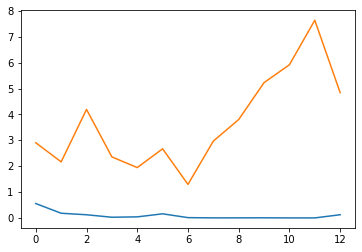

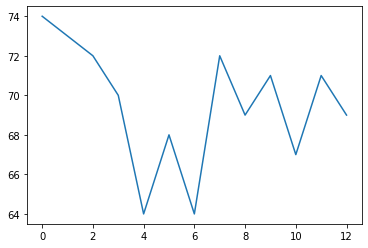

In [38]:
import matplotlib.pyplot as plt

plt.plot(loss_l, label = "train loss")
plt.plot(validloss_l, label = "valid loss")
plt.show()
plt.plot(accuracy_l, label="accuracy")
plt.show()

## model analysis

### confusion matrix

Accuracy of the network on the 1058 test images: 64 %


<function matplotlib.pyplot.show(*args, **kw)>

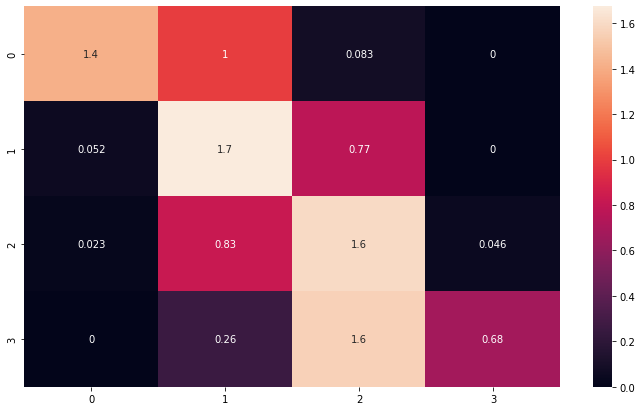

In [39]:
model.eval()


y_pred = []
y_true = []

# iterate over test data
for index, (inputs, labels) in enumerate(valid_dataloader2):
        output = model(inputs.to(device)) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

correct = 0
total = 0
with torch.no_grad():
    for data in valid_dataloader2:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = model(images.to(device))
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')

classes = [0,1,2,3]


from sklearn.metrics import confusion_matrix
import seaborn as sns
# normalize = 'pred'
cf_matrix = confusion_matrix(y_true, y_pred, normalize = 'true')
df_cm_2 = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10,index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm_2, annot=True)
plt.show

In [ ]:
torch.save(model.to('cpu').state_dict(), 'check1.pt')

In [ ]:
del data
del images
del target
del outputs

In [ ]:
torch.cuda.empty_cache()

# Google Net

## device

In [40]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## load model from torch hub

In [ ]:
torch.cuda.empty_cache()
torch.cuda.memory_allocated()

0

In [59]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [60]:
model

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

## freeze and change output layer

In [61]:
model._modules['fc'].out_features = 4
model._modules['fc'].requires_grad = False

## define criterion optimizer

In [63]:
model.train()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

## define early stopping

In [64]:
class EarlyStopping:
    """주어진 patience 이후로 validation loss가 개선되지 않으면 학습을 조기 중지"""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint2.pt'):
        """
        Args:
            patience (int): validation loss가 개선된 후 기다리는 기간
                            Default: 7
            verbose (bool): True일 경우 각 validation loss의 개선 사항 메세지 출력
                            Default: False
            delta (float): 개선되었다고 인정되는 monitered quantity의 최소 변화
                            Default: 0
            path (str): checkpoint저장 경로
                            Default: 'checkpoint.pt'
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''validation loss가 감소하면 모델을 저장한다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.to('cpu').state_dict(), self.path)
        self.val_loss_min = val_loss

## create early stopping

In [65]:
early_stopping_2 = EarlyStopping(patience = 5, path = '/content/drive/MyDrive/data/scalp/value_6/googlenet.pt')

In [66]:
print(train_dataloader2)

## train

In [67]:
loss_l = []
validloss_l = []
epoch_num = 100
accuracy_l = []
for epoch in range(epoch_num):
  model.train()
  model.to(device)
  for index, (data, target) in enumerate(train_dataloader2):
    data = data.to(device)
    target = target.to(device)
    optimizer.zero_grad()  # 기울기 초기화
    output = model(data)
    loss = criterion(output, target)
    loss.backward()  # 역전파
    optimizer.step()

  # model.to('cpu')
  model.eval()

  total = 0
  correct = 0
  for   index, (data, target) in enumerate(valid_dataloader2):
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    _, predicted = torch.max(output.data,1)
    predicted = predicted
    target = target
    total += target.size(0)
    correct += (predicted == target).sum().item()
    valid_loss = criterion(output,target)
  print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')
  early_stopping_2(valid_loss, model)
  if early_stopping_2.early_stop:
    print("Early stopping")
    break
  print(f"loss of {epoch} epoch, {loss.item():.3f} / valid loss: {valid_loss:.3f}")


  accuracy_l.append(100 * correct // total)
  loss_l.append(loss.item())
  validloss_l.append(valid_loss.item())


Accuracy of the network on the 1058 test images: 75 %
loss of 0 epoch, 0.443 / valid loss: 2.563
Accuracy of the network on the 1058 test images: 69 %
loss of 1 epoch, 0.269 / valid loss: 2.333
Accuracy of the network on the 1058 test images: 59 %
loss of 2 epoch, 0.283 / valid loss: 2.328
Accuracy of the network on the 1058 test images: 65 %
EarlyStopping counter: 1 out of 5
loss of 3 epoch, 0.203 / valid loss: 4.053
Accuracy of the network on the 1058 test images: 36 %
EarlyStopping counter: 2 out of 5
loss of 4 epoch, 0.084 / valid loss: 3.223
Accuracy of the network on the 1058 test images: 50 %
EarlyStopping counter: 3 out of 5
loss of 5 epoch, 0.057 / valid loss: 7.596
Accuracy of the network on the 1058 test images: 58 %
EarlyStopping counter: 4 out of 5
loss of 6 epoch, 0.132 / valid loss: 4.892
Accuracy of the network on the 1058 test images: 55 %
EarlyStopping counter: 5 out of 5
Early stopping


In [ ]:
torch.cuda.empty_cache()

In [68]:
model.load_state_dict(torch.load('/content/drive/MyDrive/data/scalp/value_6/googlenet.pt'))
model.to(device)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

## plot loss

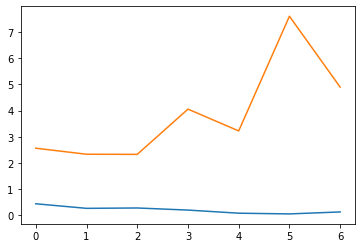

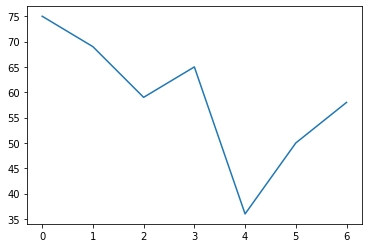

In [69]:
import matplotlib.pyplot as plt

plt.plot(loss_l, label = "train loss")
plt.plot(validloss_l, label = "valid loss")
plt.show()
plt.plot(accuracy_l, label="accuracy")
plt.show()

## model analysis

### confusion matrix

Accuracy of the network on the 1058 test images: 59 %


<function matplotlib.pyplot.show(*args, **kw)>

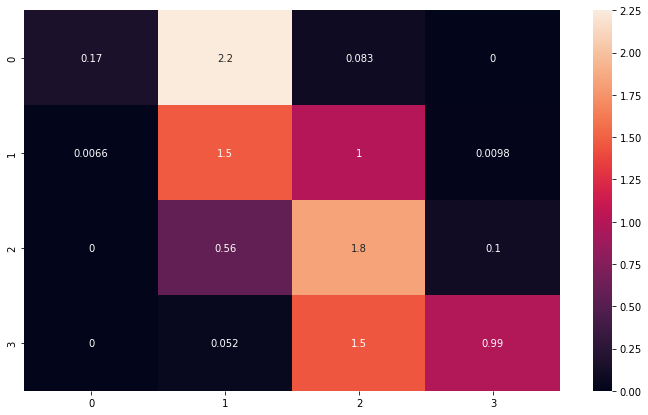

In [70]:
model.eval()


y_pred = []
y_true = []

# iterate over test data
for index, (inputs, labels) in enumerate(valid_dataloader2):
        output = model(inputs.to(device)) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

correct = 0
total = 0
with torch.no_grad():
    for data in valid_dataloader2:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = model(images.to(device))
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')

classes = [0,1,2,3]


from sklearn.metrics import confusion_matrix
import seaborn as sns
# normalize = 'pred'
cf_matrix = confusion_matrix(y_true, y_pred, normalize = 'true')
df_cm_2 = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10,index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm_2, annot=True)
plt.show

In [ ]:
torch.cuda.empty_cache()

# Efficient Net pretrained = False

## device

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## load model from torch hub

In [ ]:
torch.cuda.empty_cache()
torch.cuda.memory_allocated()

0

In [93]:
model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b4', pretrained=False)

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [94]:
model

EfficientNet(
  (stem): Sequential(
    (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (activation): SiLU(inplace=True)
  )
  (layers): Sequential(
    (0): Sequential(
      (block0): MBConvBlock(
        (depsep): Sequential(
          (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
          (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (se): SequentialSqueezeAndExcitation(
          (squeeze): Linear(in_features=48, out_features=12, bias=True)
          (expand): Linear(in_features=12, out_features=48, bias=True)
          (activation): SiLU(inplace=True)
          (sigmoid): Sigmoid()
          (mul_a_quantizer): Identity()
          (mul_b_quantizer): Identity()
        )
    

## change output layer

In [95]:
model._modules['classifier']._modules['fc'].out_features = 4
model._modules['classifier']._modules['fc'].requires_grad = False

## define criterion optimizer

In [96]:
model.train()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

## define early stopping

In [97]:
class EarlyStopping:
    """주어진 patience 이후로 validation loss가 개선되지 않으면 학습을 조기 중지"""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint2.pt'):
        """
        Args:
            patience (int): validation loss가 개선된 후 기다리는 기간
                            Default: 7
            verbose (bool): True일 경우 각 validation loss의 개선 사항 메세지 출력
                            Default: False
            delta (float): 개선되었다고 인정되는 monitered quantity의 최소 변화
                            Default: 0
            path (str): checkpoint저장 경로
                            Default: 'checkpoint.pt'
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''validation loss가 감소하면 모델을 저장한다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.to('cpu').state_dict(), self.path)
        self.val_loss_min = val_loss

## create early stopping

In [100]:
early_stopping_2 = EarlyStopping(patience = 5, path = '/content/drive/MyDrive/data/scalp/value_6/nvidia_efficientnet_b4_f.pt')

In [99]:
print(train_dataloader2)

## train

In [101]:
loss_l = []
validloss_l = []
epoch_num = 100
accuracy_l = []
for epoch in range(epoch_num):
  model.train()
  model.to(device)
  for index, (data, target) in enumerate(train_dataloader2):
    data = data.to(device)
    target = target.to(device)
    optimizer.zero_grad()  # 기울기 초기화
    output = model(data)
    loss = criterion(output, target)
    loss.backward()  # 역전파
    optimizer.step()

  # model.to('cpu')
  model.eval()

  total = 0
  correct = 0
  for   index, (data, target) in enumerate(valid_dataloader2):
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    _, predicted = torch.max(output.data,1)
    predicted = predicted
    target = target
    total += target.size(0)
    correct += (predicted == target).sum().item()
    valid_loss = criterion(output,target)
  print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')
  early_stopping_2(valid_loss, model)
  if early_stopping_2.early_stop:
    print("Early stopping")
    break
  print(f"loss of {epoch} epoch, {loss.item():.3f} / valid loss: {valid_loss:.3f}")


  accuracy_l.append(100 * correct // total)
  loss_l.append(loss.item())
  validloss_l.append(valid_loss.item())


Accuracy of the network on the 1058 test images: 72 %
loss of 0 epoch, 0.674 / valid loss: 2.372
Accuracy of the network on the 1058 test images: 71 %
loss of 1 epoch, 0.620 / valid loss: 1.608
Accuracy of the network on the 1058 test images: 40 %
loss of 2 epoch, 0.555 / valid loss: 0.521
Accuracy of the network on the 1058 test images: 67 %
EarlyStopping counter: 1 out of 5
loss of 3 epoch, 0.496 / valid loss: 1.086
Accuracy of the network on the 1058 test images: 57 %
EarlyStopping counter: 2 out of 5
loss of 4 epoch, 0.517 / valid loss: 2.758
Accuracy of the network on the 1058 test images: 55 %
EarlyStopping counter: 3 out of 5
loss of 5 epoch, 0.594 / valid loss: 2.460
Accuracy of the network on the 1058 test images: 60 %
EarlyStopping counter: 4 out of 5
loss of 6 epoch, 0.155 / valid loss: 2.243
Accuracy of the network on the 1058 test images: 60 %
EarlyStopping counter: 5 out of 5
Early stopping


In [ ]:
torch.cuda.empty_cache()

In [104]:
model.load_state_dict(torch.load('/content/drive/MyDrive/data/scalp/value_6/nvidia_efficientnet_b4_f.pt'))
model.to(device)

EfficientNet(
  (stem): Sequential(
    (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (activation): SiLU(inplace=True)
  )
  (layers): Sequential(
    (0): Sequential(
      (block0): MBConvBlock(
        (depsep): Sequential(
          (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
          (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (se): SequentialSqueezeAndExcitation(
          (squeeze): Linear(in_features=48, out_features=12, bias=True)
          (expand): Linear(in_features=12, out_features=48, bias=True)
          (activation): SiLU(inplace=True)
          (sigmoid): Sigmoid()
          (mul_a_quantizer): Identity()
          (mul_b_quantizer): Identity()
        )
    

## plot loss

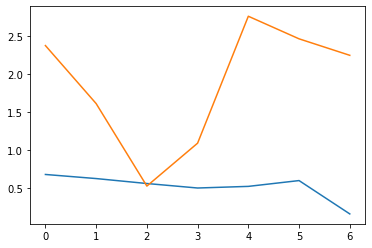

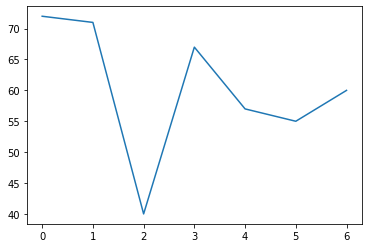

In [102]:
import matplotlib.pyplot as plt

plt.plot(loss_l, label = "train loss")
plt.plot(validloss_l, label = "valid loss")
plt.show()
plt.plot(accuracy_l, label="accuracy")
plt.show()

## model analysis

### confusion matrix

Accuracy of the network on the 1058 test images: 40 %


<function matplotlib.pyplot.show(*args, **kw)>

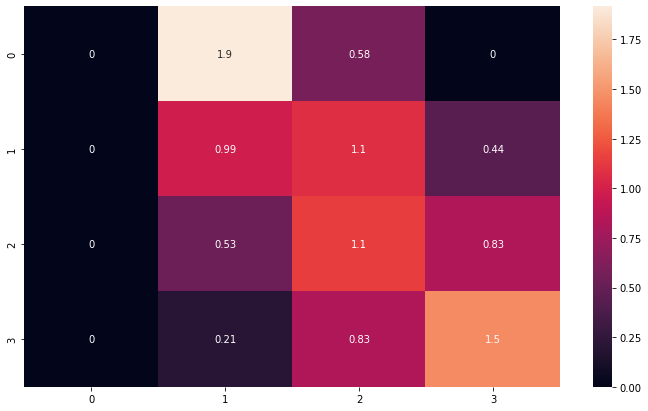

In [105]:
model.eval()


y_pred = []
y_true = []

# iterate over test data
for index, (inputs, labels) in enumerate(valid_dataloader2):
        output = model(inputs.to(device)) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

correct = 0
total = 0
with torch.no_grad():
    for data in valid_dataloader2:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = model(images.to(device))
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')

classes = [0,1,2,3]


from sklearn.metrics import confusion_matrix
import seaborn as sns
# normalize = 'pred'
cf_matrix = confusion_matrix(y_true, y_pred, normalize = 'true')
df_cm_2 = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10,index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm_2, annot=True)
plt.show

In [ ]:
torch.save(model.to('cpu').state_dict(), 'check1.pt')

In [ ]:
del data
del images
del target
del outputs

In [ ]:
torch.cuda.empty_cache()